In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [173]:
from sklearn.datasets import make_classification

In [174]:
X,y=make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [176]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [177]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [178]:
y_pred=logistic.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [180]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Hyperparameter Tuning & Cross Validation

In [181]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

In [182]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [183]:
## gridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv, n_jobs=-1)

In [184]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [185]:
grid.fit(X_train,y_train)

c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [186]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [187]:
grid.best_score_

np.float64(0.9242857142857142)

In [188]:
y_pred=grid.predict(X_test)

In [189]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Randomised Search CV

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params, cv=5, scoring='accuracy')

In [192]:
randomcv.fit(X_train,y_train)

c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\Desktop\data science\ds\Lib\site-packages\s

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [193]:
randomcv.best_score_

np.float64(0.9242857142857142)

In [194]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

In [195]:
y_pred=randomcv.predict(X_test)

In [196]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Logistic Regression for Multiclass Classification Problem

In [197]:
X,y=make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=15)

In [198]:
X

array([[-1.28613186, -0.64833414,  1.04411477, ..., -1.3164116 ,
         1.01191003, -0.89806282],
       [-0.22222406,  2.083232  ,  1.19111402, ...,  0.98140271,
        -1.62879759,  1.37759419],
       [-0.43196264,  0.37574543, -1.37033375, ...,  1.2926021 ,
         0.925545  ,  0.23270542],
       ...,
       [-0.16384636, -0.41072503,  0.73908587, ...,  0.55830515,
         1.08971786, -0.26627295],
       [ 1.74969059, -1.12416838,  0.19980683, ...,  0.75255654,
         0.32229436, -0.17334302],
       [-0.24755583, -1.1705942 , -1.14058569, ...,  0.2063625 ,
         1.84351802, -0.81483138]], shape=(1000, 10))

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [200]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [201]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [202]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



## Logistic Regression for Imbalanced Dataset

In [1]:
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
## imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                        n_redundant=0,weights=[0.99],random_state=10)

In [3]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [4]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: xlabel='0', ylabel='1'>

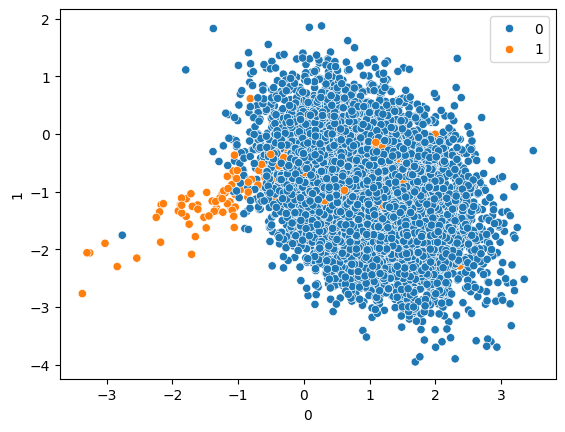

In [10]:
import seaborn as sns
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
# Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]] 

In [13]:
params=dict(penalty=penalty,C=c_values,solver=solver, class_weight=class_weight)

In [14]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv, n_jobs=-1)

In [16]:
grid.fit(X_train,y_train)

c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [17]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [18]:
y_pred=grid.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic Regression using ROC curve and ROC AUC score

In [21]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [22]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [23]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)